# Global Population and Migration Trends Analysis

## Table of Contents
1. Introduction
2. Data Import and Preparation
3. Population Distribution Analysis
4. Population Growth Rate Analysis
5. Migration Rate Analysis
6. Conclusion
7. References

## 1. Introduction

This analysis explores global population and migration trends using data from the World Bank. We'll investigate population distribution changes, growth rates, and migration patterns from 1960 to 2023. This study aims to provide insights into demographic shifts and their potential implications for policy and planning.


## 2. Data Import and Preparation

In this section, we'll import the necessary libraries, load our datasets, and prepare the data for analysis. We're using population and migration data from the World Bank, spanning from 1960 to 2023.

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Load the datasets
population_data = pd.read_csv('world_bank_population.csv')
migration_data = pd.read_csv('world_bank_migration.csv')

# Extract year columns
year_columns = population_data.columns[4:]

# Melt the data to long format
population_data_long = population_data.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], 
    value_vars=year_columns, 
    var_name="Year", 
    value_name="Population"
)
migration_data_long = migration_data.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], 
    value_vars=year_columns, 
    var_name="Year", 
    value_name="Migration Rate"
)

# Convert Year to integer
population_data_long['Year'] = population_data_long['Year'].astype(int)
migration_data_long['Year'] = migration_data_long['Year'].astype(int)


## 3. Population Distribution Analysis

We'll examine how global population distribution has changed over three key periods: 1960-1979, 1980-1999, and 2000-2023.


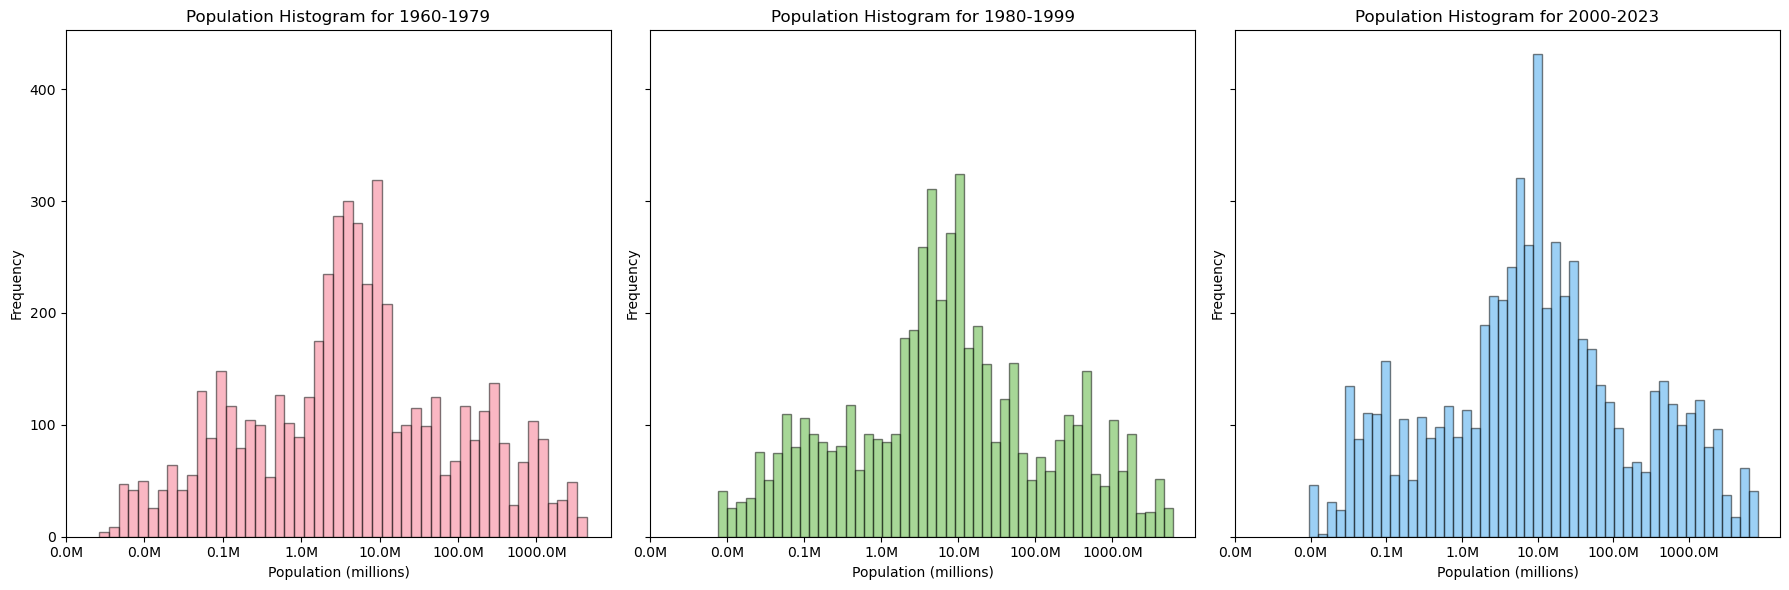

In [2]:
# Define time periods
time_periods = {
    "1960-1979": (1960, 1979),
    "1980-1999": (1980, 1999),
    "2000-2023": (2000, 2023)
}

# Create histograms for population distribution
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
colors = sns.color_palette("husl", len(time_periods))

for ax, (color, (period, years)) in zip(axs, zip(colors, time_periods.items())):
    period_data = population_data_long[population_data_long['Year'].between(years[0], years[1])]
    ax.hist(np.log10(period_data['Population']), bins=50, alpha=0.5, color=color, edgecolor='black')
    ax.set_title(f'Population Histogram for {period}')
    ax.set_xlabel('Population (millions)')
    ax.set_ylabel('Frequency')
    ticks = [3, 4, 5, 6, 7, 8, 9]
    tick_labels = [f"{10**tick / 1e6:.1f}M" for tick in ticks]
    ax.set_xticks(ticks)
    ax.set_xticklabels(tick_labels)

plt.tight_layout()
plt.show()


### Key Insights:

1. 1960-1979: Most countries had populations between 1-10 million.
2. 1980-1999: The peak shifted towards 10 million, indicating population growth.
3. 2000-2023: A wider distribution is observed, with more countries having populations over 10 million.

This trend shows a clear global population increase and growing diversity in country sizes over time.

## 4. Population Growth Rate Analysis

Next, we'll analyze population growth rates to identify significant changes over time.


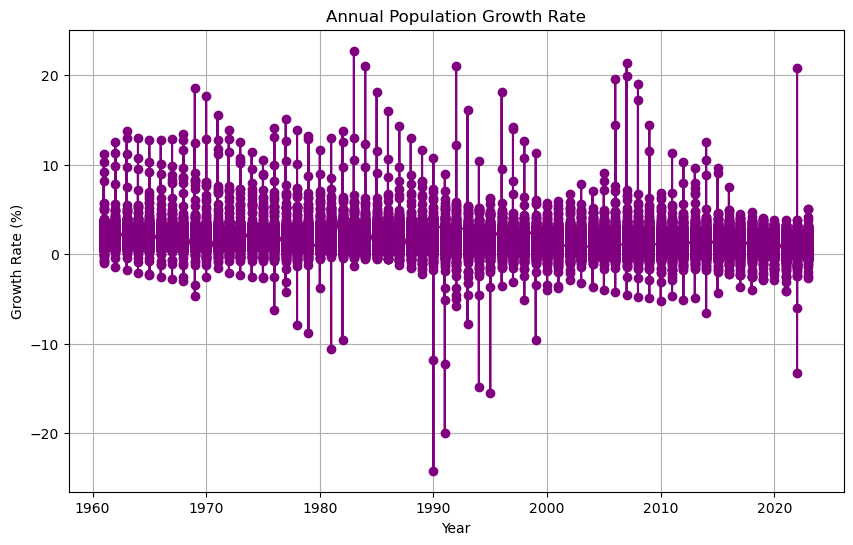

In [3]:
# Calculate annual population growth rate
population_data_long['Growth Rate'] = population_data_long.groupby('Country Code')['Population'].pct_change(fill_method=None) * 100

# Plot population growth rate over the years
plt.figure(figsize=(10, 6))
plt.plot(population_data_long['Year'], population_data_long['Growth Rate'], marker='o', linestyle='-', color='purple')
plt.title('Annual Population Growth Rate')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.show()


### Key Insights:

1. Fluctuations: Significant variations in growth rates, with some years showing very high growth (above 20%) and others showing negative growth (below -20%).
2. Trends: Decreasing variability in growth rates over time, with extreme rates becoming less frequent in recent years.
3. Economic and Policy Impacts: These fluctuations likely reflect economic changes, social shifts, and policy impacts across different periods, affecting everything from resource allocation to infrastructure development.

## 5. Migration Rate Analysis

Finally, we'll examine migration rate trends over the years to understand population movement patterns.


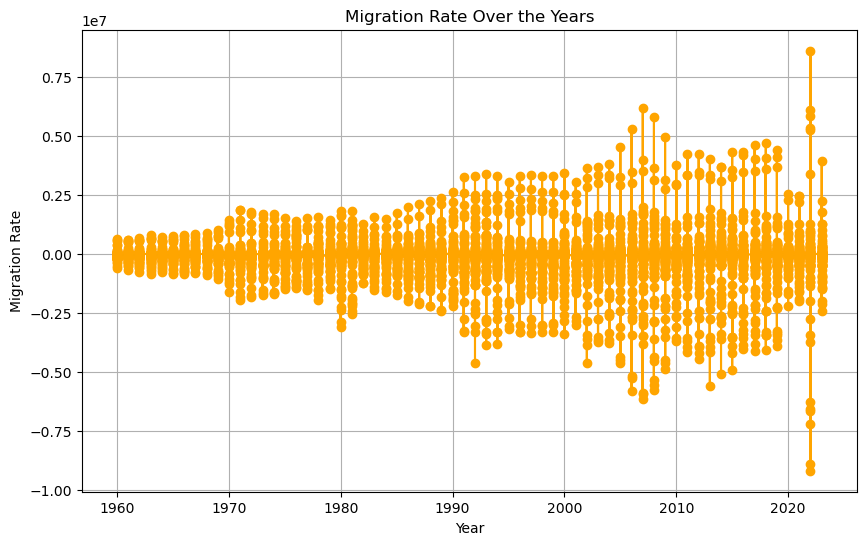

In [4]:
# Plot migration rate over the years
plt.figure(figsize=(10, 6))
plt.plot(migration_data_long['Year'], migration_data_long['Migration Rate'], marker='o', linestyle='-', color='orange')
plt.title('Migration Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Migration Rate')
plt.grid(True)
plt.show()


### Key Insights:

1. Fluctuations: Noticeable fluctuations in migration rates, with significant variations from the 1980s onwards. This indicates periods of high immigration and emigration.
2. Trends: The data points show periods where the migration rates either increased or decreased significantly, suggesting changing migration patterns over time.
3. Economic and Policy Impacts: The peaks and troughs could be correlated with historical events, such as economic crises, wars, or changes in immigration policies.

## 6. Conclusion

The analysis reveals a clear trend of global population growth and increasing diversity in country sizes. The histograms show a shift towards higher population ranges over time, with significant growth observed from 2000 to 2023. Population growth rates reflect dynamic changes influenced by economic development and policy shifts, while migration rates reveal fluctuating patterns tied to historical events. These insights underscore the importance of understanding demographic changes for future planning and policy-making.

## 7. References

1. World Bank. "Population, total." Retrieved from [data.worldbank.org/indicator/SP.POP.TOTL](https://data.worldbank.org/indicator/SP.POP.TOTL).
2. World Bank. "Net migration." Retrieved from [data.worldbank.org/indicator/SM.POP.NETM](https://data.worldbank.org/indicator/SM.POP.NETM).
